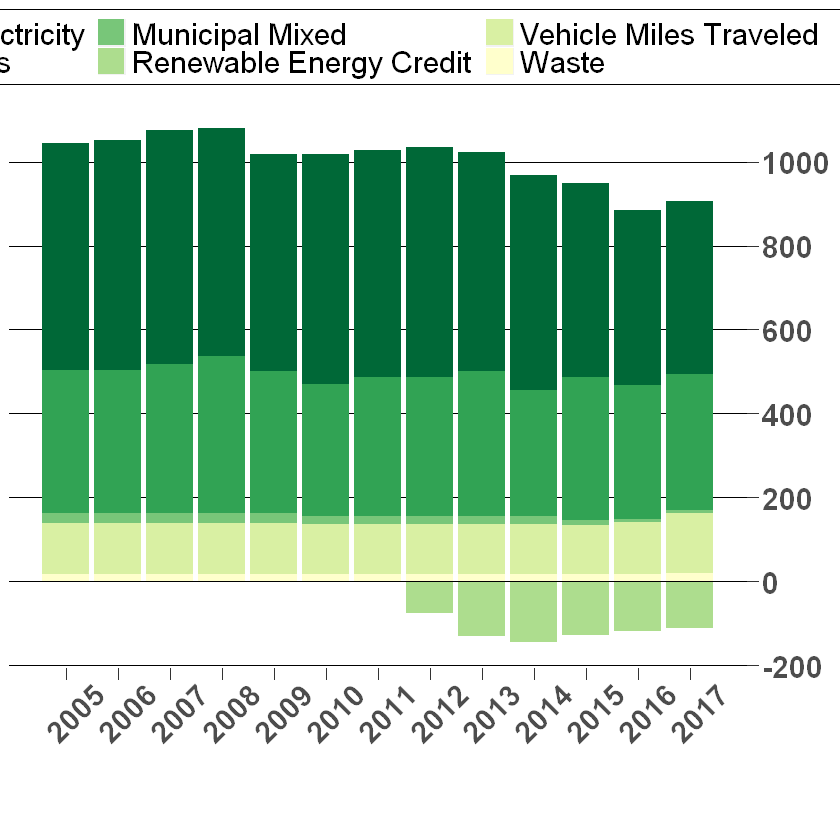

In [107]:
library(ggplot2)
fn <- '../src/data/interim/emissions2017_long_simple.csv'
emissions <- read.csv(file=fn, header=TRUE, sep=",")
deb <- subset(emissions, MTCO2e >= 0)
cred <-subset(emissions, MTCO2e < 0)
pal = c("#ffffcc", "#D9F0A3", "#ADDD8E", "#78C679", "#31A354", "#006837")  #brown #bf714d
p <- ggplot() +
  theme(
    panel.background = element_rect(fill = "transparent") # bg of the panel
    , plot.background = element_rect(fill = "transparent", color = NA) # bg of the plot
    , panel.grid.major.x = element_blank() # get rid of major grid for x
    , panel.grid.major.y = element_line(color = 'black') # keep major grid for y
    , panel.grid.minor = element_blank() # get rid of minor grid
    , axis.ticks.length = unit(0.1, "in")
    , legend.background = element_rect(fill = "transparent") # get rid of legend bg
    , legend.box.background = element_rect(fill = "transparent") # get rid of legend panel bg
    , legend.position = 'top' # set to 'none' to hide legend
    , legend.text = element_text(margin=margin(0,0.1,0,0.05,"in"), size=18)
    , legend.title = element_blank()
    , axis.text.x = element_text(margin=margin(0.2,0.5,0.5,0.5,"in"), face="bold", size=18, angle=45)
    , panel.grid.minor.x = element_blank()
    , axis.text.y = element_text(face="bold", size=18)
    , axis.title = element_blank()
  )

em <-
    p + 
    geom_bar(
        data = deb, 
        aes(x=Year, y=MTCO2e/1000, fill=Source), 
        stat = "identity"
    ) +
    geom_bar(
        data = cred,
        aes(x=Year, y=MTCO2e/1000, fill=Source), 
        stat = "identity"
    ) +
    #geom_text(data=deb, aes(x=Year, y=MTCO2e/1000, label=Type), vjust=-0.25) +
    scale_fill_manual(values = rev(pal)) +
    geom_hline(yintercept = 0) +
    scale_x_continuous(breaks=seq(2005,2017,1)) +
    scale_y_continuous(breaks=seq(-200,1150,200), position='right')
em

In [108]:
ggsave(em, filename = "../reports/figures/Emissions_2005to2017_final.png", width=10, height=8,  bg = "transparent")

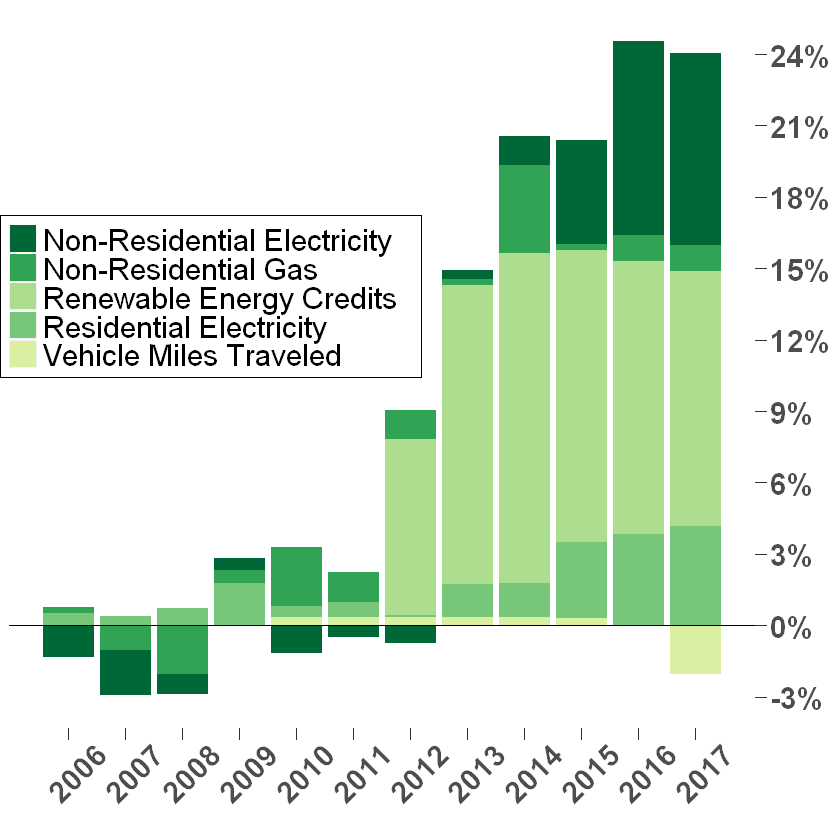

In [209]:
fn <- '../src/data/interim/emissions2017_long_diff_simple.csv'
emissions <- read.csv(file=fn, header=TRUE, sep=",")
deb <- subset(emissions, PercentdMTCO2e >= 0)
cred <-subset(emissions, PercentdMTCO2e < 0)
pal = c("#D9F0A3", "#78C679", "#ADDD8E", "#31A354", "#006837")

em <-
    p + 
    theme(legend.position = c(0.27,0.6), 
          legend.box = 'vertical', 
          panel.grid.major.y = element_blank(),
          axis.text.x = element_text(margin=margin(0.2,0,0,0,"in"), 
                                     face="bold", 
                                     size=18, 
                                     angle=45)
         ) +
    geom_bar(
        data = deb, 
        aes(x=Year, y=PercentdMTCO2e*-1, fill=Use), 
        stat = "identity"
    ) +
    geom_bar(
        data = cred,
        aes(x=Year, y=PercentdMTCO2e*-1, fill=Use), 
        stat = "identity"
    ) +
    scale_fill_manual(values = rev(pal)) +
    geom_hline(yintercept = 0) +
    scale_x_continuous(breaks=seq(2006,2017,1),
                       position = 'bottom') +
    scale_y_continuous(labels=scales::percent_format(accuracy=1), 
                       breaks=seq(-0.03, 0.24, 0.03),
                       position = 'right')
    #geom_hline(color = "#78C679", yintercept = -24)
em

In [210]:
ggsave(em, filename = "../reports/figures/Emissions_2005to2017_diff_final.png", width=10, height=8,  bg = "transparent")